In [1]:
import warnings
warnings.filterwarnings('ignore')

from task2 import ClassificationPipeline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
model = ClassificationPipeline()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing TFBartForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBartForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBartForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForSequenceClassification for predictions without further training.
Device set to use 0


In [3]:
directory = 'dataset/raw-img'

datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.15)

validation_generator = datagen.flow_from_directory(directory,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    shuffle=False,
                                                    subset='validation',
                                                    class_mode='categorical')

Found 3922 images belonging to 10 classes.


In [4]:
for x_batch, y_batch in validation_generator:
    print(x_batch.shape)
    break

(32, 224, 224, 3)


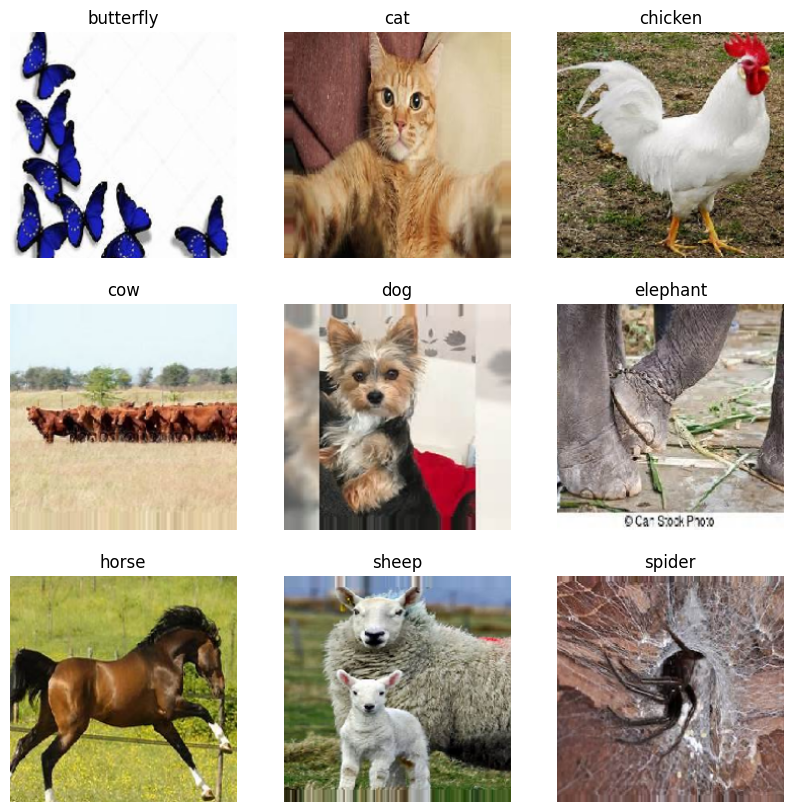

In [5]:
max_images = 9
class_labels = list(validation_generator.class_indices.keys())

max_images = 9
selected_images = []
selected_labels = set()

plt.figure(figsize=(10, 10))

for X_batch, y_batch in validation_generator:
    for i in range(len(X_batch)):
        label_index = np.where(y_batch[i] == 1)[0][0]

        if label_index not in selected_labels:
            selected_images.append((X_batch[i], label_index))
            selected_labels.add(label_index)

        if len(selected_images) == max_images:
            break
    if len(selected_images) == max_images:
        break

for i, (image, label_index) in enumerate(selected_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(class_labels[label_index])
    plt.axis("off")

plt.show()

In [6]:
input_messages = ["There is a butterfly resting on the flower.",
                  "A dog is sleeping on the windowsill.",
                  "The chicken is pecking at the ground for food.",
                  "A cow is grazing in the green meadow.",
                  "The cat is happily wagging its tail.",
                  "An elephant is spraying water with its trunk.",
                  "The sheep is galloping across the field.",
                  "A sheep is resting under the tree.",
                  "There is a spider swinging from a branch."
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


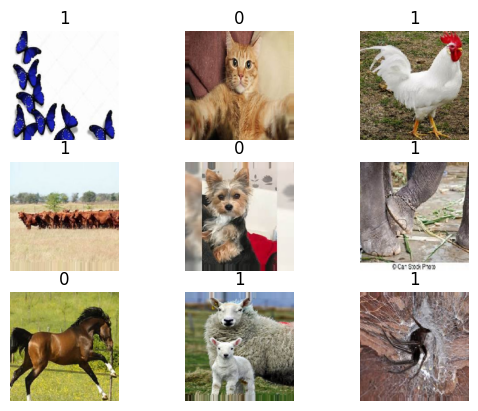

In [7]:
for i, (image, label_index) in enumerate(selected_images):
    image_pil = Image.fromarray((image * 255).astype(np.uint8))
    pred = model.predict(input_messages[i], image_pil)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(pred)
    plt.axis("off")

plt.show()